In [3]:
! pip install prophet

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached prophet-1.1.1-cp39-cp39-win_amd64.whl (12.1 MB)
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.17-py3-none-any.whl (187 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
     ---------------------------------------- 5.4/5.4 MB 520.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 553.2 kB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=f48c77bf3ac768b628993bba260dac580c6c8fa5192cdf2d6b5f60705e9792a7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\63\c2\1a\79ea449ff5ce716cff41ddca7fd67c425fd16528baf87e11ee
Successfully built pymeeus


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.1/12.1 MB 897.9 kB/s eta 0:00:00
     ------------------------------------ 187.4/187.4 kB 872.7 kB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 81.2/81.2 kB 909.3 kB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 448.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
     ---------------------------------------- 1.4/1.4 MB 515.6 kB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=f48c77bf3ac768b628993bba260dac580c6c8fa5192cdf2d6b5f60705e9792a7
  Stored in directory: c:\users\user\appdata\local\pip\


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from prophet import Prophet

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
m = Prophet()
m.fit(df)

13:05:52 - cmdstanpy - INFO - Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210268,7.488084,8.934632
3266,2017-01-16,8.535296,7.777552,9.273107
3267,2017-01-17,8.322712,7.587794,9.069186
3268,2017-01-18,8.155345,7.402194,8.901779
3269,2017-01-19,8.167304,7.459920,8.875605


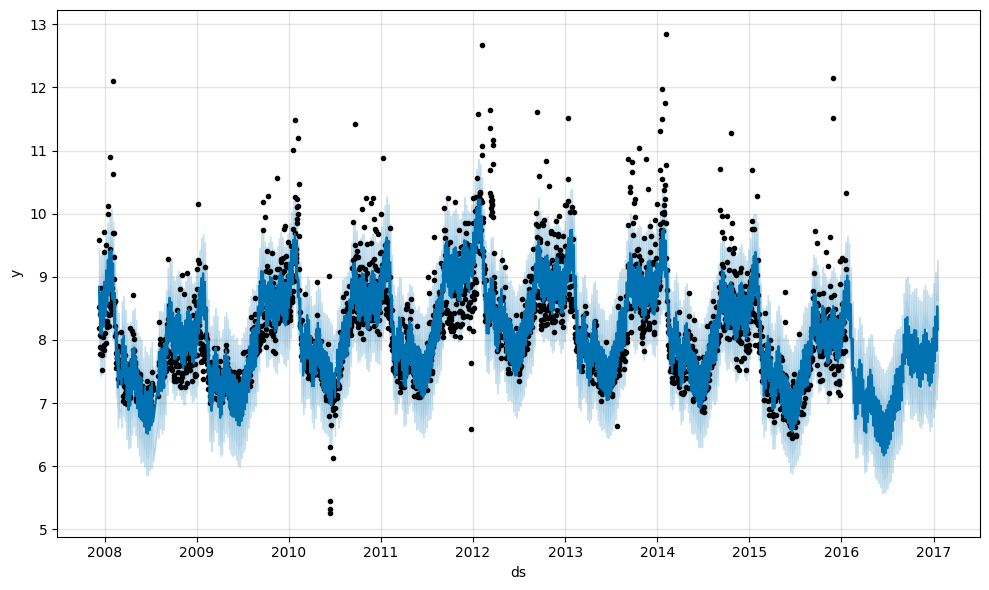

In [9]:
fig1 = m.plot(forecast)

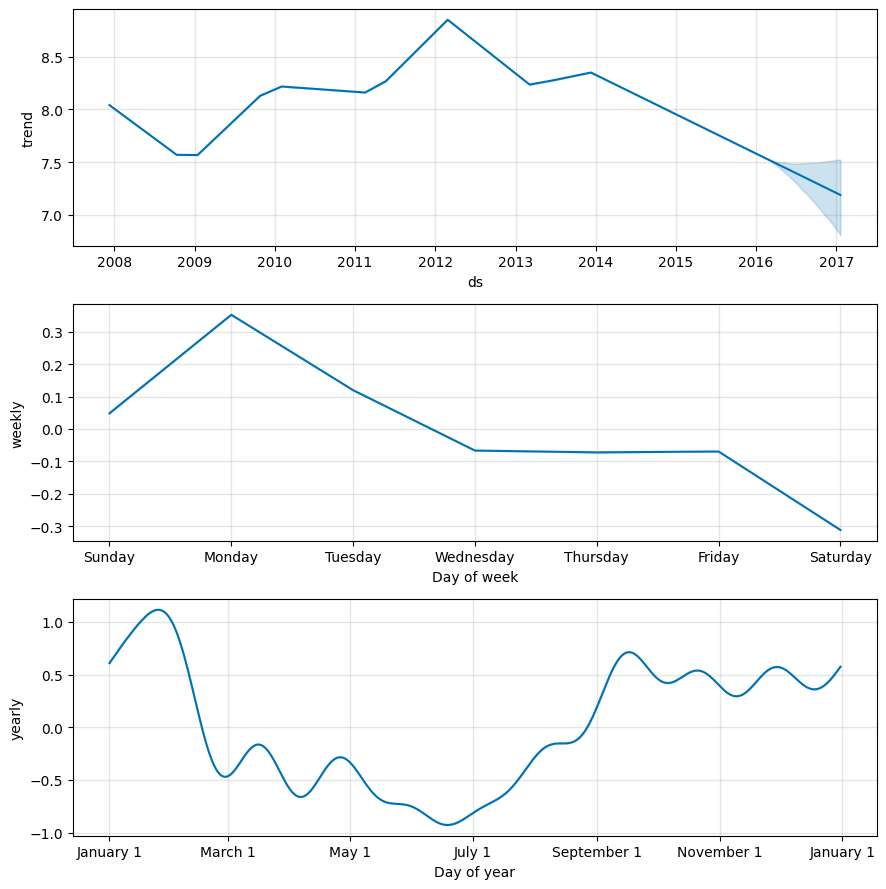

In [10]:
fig2 = m.plot_components(forecast)

In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)